In [4]:
import matplotlib as plt
import os
import pandas as pd
import json

In [5]:
def count_common_params(model_dict, param_set):
    """
    Função que conta a quantidade de vezes que os parâmetros do dicionário 'param_set' se repetem
    entre os modelos no dicionário 'model_dict'.
    
    Args:
    - model_dict (dict): Dicionário contendo os modelos com seus respectivos parâmetros.
    - param_set (dict): Dicionário com os parâmetros e valores a buscar.
    
    Returns:
    - dict: Contagem dos parâmetros que se repetem nos modelos.
    """
    common_param_count = {param: 0 for param in param_set}

    for model in model_dict.values():
        for param, value in model["params"].items():
            if param in param_set and param_set[param] == value:
                common_param_count[param] += 1

    return common_param_count

def plot_common_params_count(model_dict, param_set):
    """
    Função que gera um gráfico de barras horizontais com a contagem de repetição dos parâmetros.
    
    Args:
    - model_dict (dict): Dicionário contendo os modelos com seus respectivos parâmetros.
    - param_set (dict): Dicionário com os parâmetros e valores a buscar.
    """
    common_param_count = count_common_params(model_dict, param_set)

    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(list(common_param_count.keys()), list(common_param_count.values()), color="#8578CFFF")
    plt.xlabel('Contagem de Repetição dos Parâmetros')
    plt.title('Contagem de Parâmetros Repetidos nos Modelos')
    plt.show()

def load_json(path):
    if os.path.exists(path):
        with open(path, "r") as f:
            return json.load(f)
    return {}

In [6]:
decision_tree = load_json("../../models/decision_tree/decision_tree.json")
knn = load_json("../../models/knn/knn.json")
lgbm = load_json("../../models/lgbm/lgbm.json")
lvq = load_json("../../models/lvq/lvq2.json")
mlp = load_json("../../models/mlp/mlp.json")
random_forest = load_json("../../models/random_forest/random_forest.json")
svm = load_json("../../models/svm/svm.json")
xgboost = load_json("../../models/xgboost/xgboost.json")

list_models = [
    ("svm", svm.values()),
    ("xgboost", xgboost.values()),
    ("random_forest", random_forest.values()),
    ("mlp", mlp.values()),
    ("lvq", lvq),
    ("lgbm", lgbm.values()),
    ("knn", knn.values()),
    ("decision_tree", decision_tree.values())
]


In [7]:
import pandas as pd

def create_comparison_dataframe(list_models, metrics=["model_time", "accuracy_test", "f1_score", "recall", "auc"]):
    new_df = []
    for model_name, results in list_models:
        model_metrics = {'name': model_name}
        for metric in metrics:
            model_metrics[f"{metric}_avg"] = float(pd.DataFrame(results)[metric].mean())
            model_metrics[f"{metric}_max"] = float(pd.DataFrame(results)[metric].max())
            model_metrics[f"{metric}_std"] = float(pd.DataFrame(results)[metric].std())
        new_df.append(model_metrics)
    return pd.DataFrame(new_df)


In [8]:
comparison_df = create_comparison_dataframe(list_models)

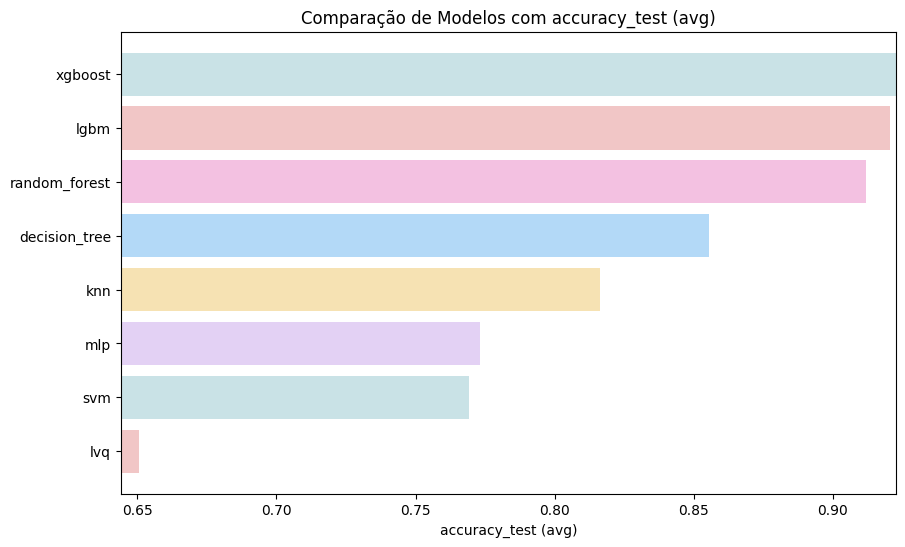

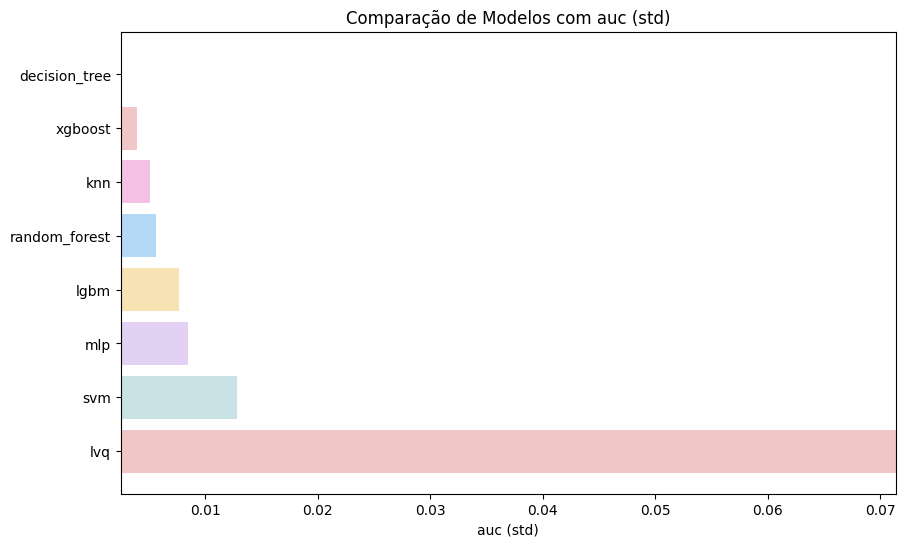

In [10]:
import matplotlib.pyplot as plt
def plot_comparison_with_custom_axis(df, metric, value_type="avg"):
    """
    Função que plota o gráfico de comparação dos modelos com a métrica especificada, utilizando tons pastéis de cores
    e ajustando o eixo para melhorar o detalhamento.
    
    Args:
    - df (pd.DataFrame): DataFrame com os modelos e suas métricas.
    - metric (str): A métrica a ser plotada (ex: 'model_time', 'accuracy_test', etc.).
    - value_type (str): Tipo de valor a ser usado ('avg', 'max', 'std').
    """
    # Selecionar as colunas baseadas na métrica e tipo de valor
    col_name = f"{metric}_{value_type}"
    
    # Ordenando os modelos do maior para o menor, exceto o std
    if value_type != "std":
        df_sorted = df.sort_values(by=col_name, ascending=True)
    else:
        df_sorted = df.sort_values(by=col_name, ascending=False)
    
    # Definindo uma paleta de cores pastel
    pastel_colors = ['#f1c6c6', '#c9e2e6', '#e3d1f4', '#f6e2b3', '#b3d9f7', '#f3c1e1']
    
    # Definindo o mínimo para o eixo X para melhorar o detalhamento
    min_value = df_sorted[col_name].min() * 0.99  # 10% abaixo do valor mínimo
    max_value = df_sorted[col_name].max()
    
    # Plotando o gráfico com cores pastéis
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted["name"], df_sorted[col_name], color=pastel_colors[:len(df_sorted)])
    plt.xlabel(f'{metric} ({value_type})')
    plt.xlim(min_value, max_value)  # Ajustando os limites do eixo X
    plt.title(f'Comparação de Modelos com {metric} ({value_type})')
    plt.show()

# Exemplo de uso com o DataFrame gerado e ajustando o eixo para a métrica 'accuracy_test' (média)
plot_comparison_with_custom_axis(comparison_df, "accuracy_test", "avg")  # Para média da métrica accuracy_test
plot_comparison_with_custom_axis(comparison_df, "auc", "std")  # Para desvio padrão da métrica auc


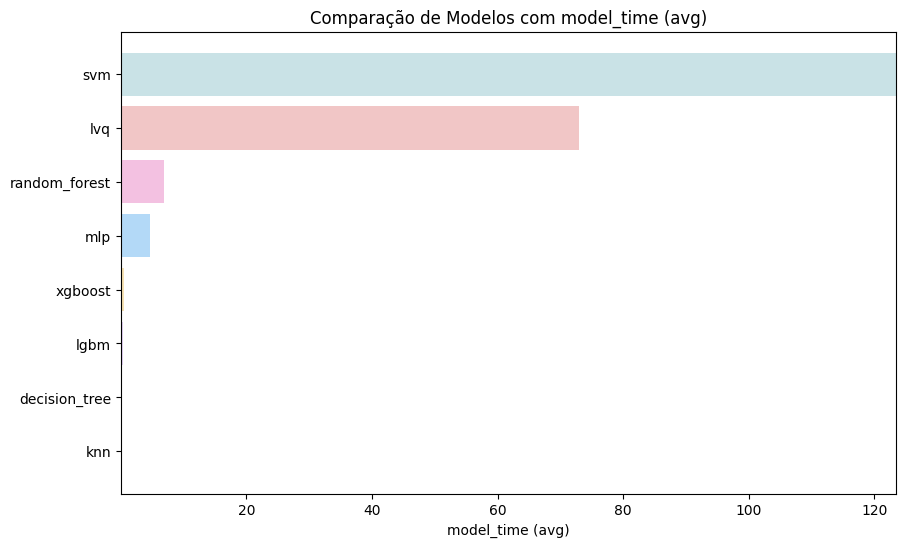

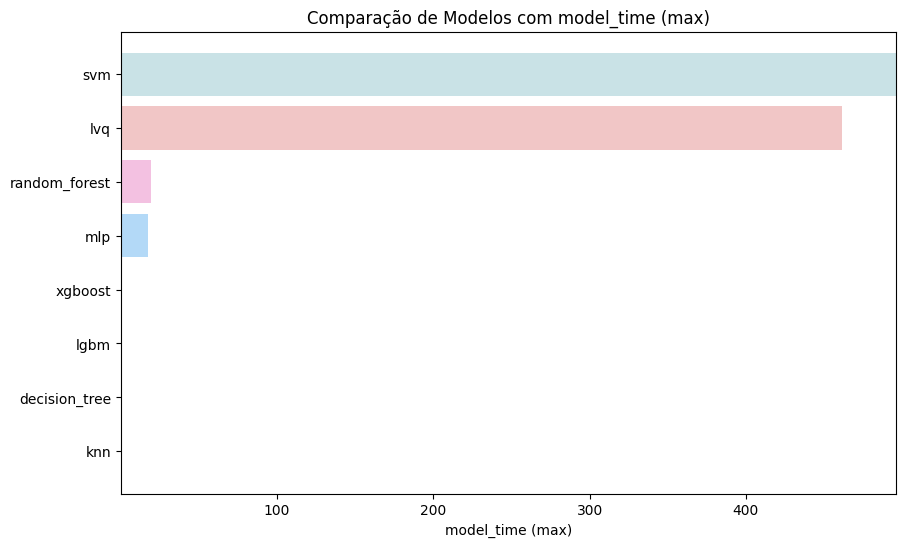

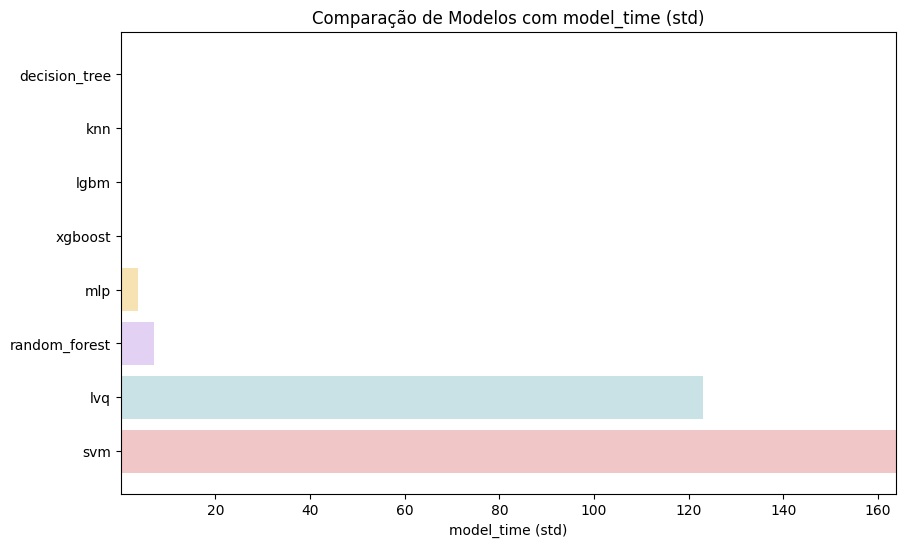

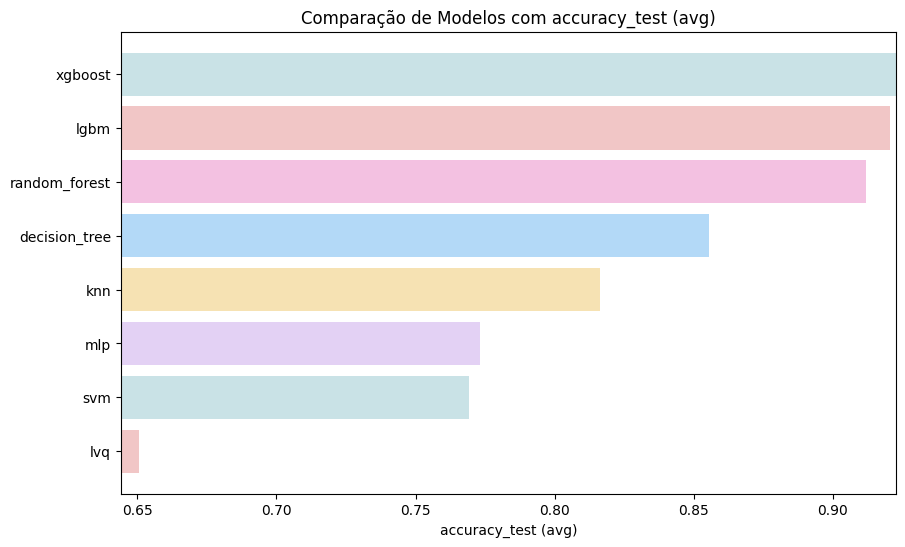

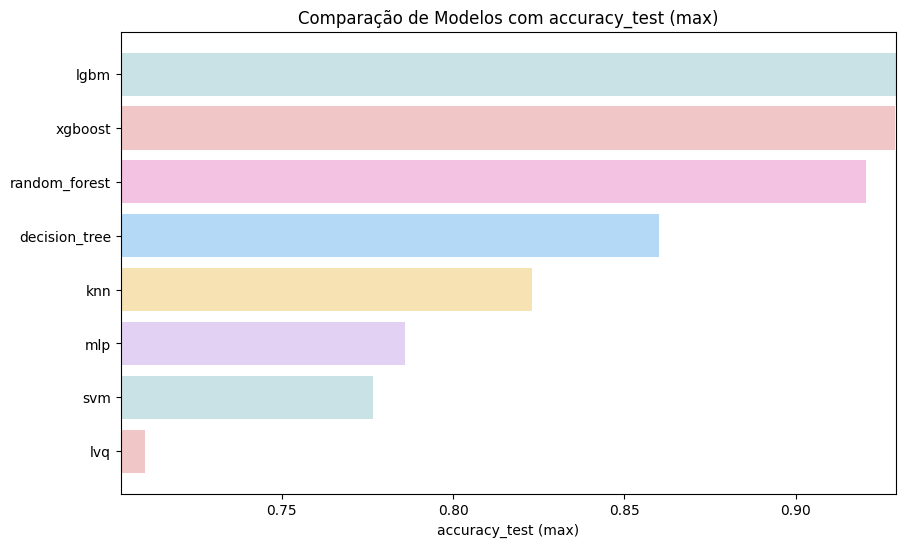

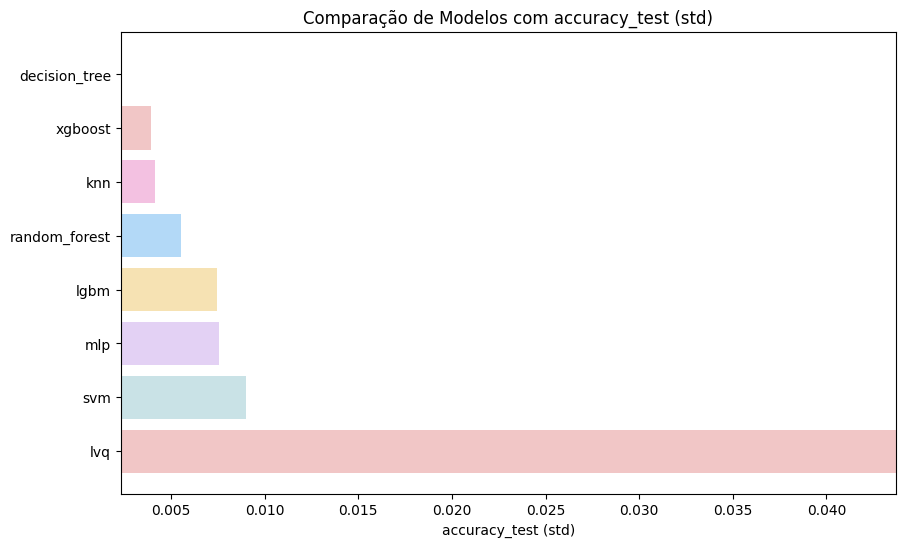

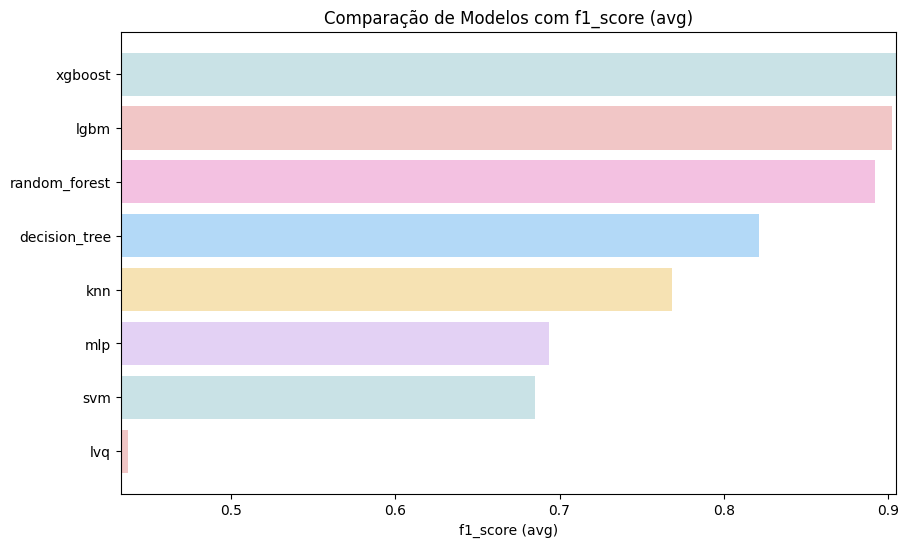

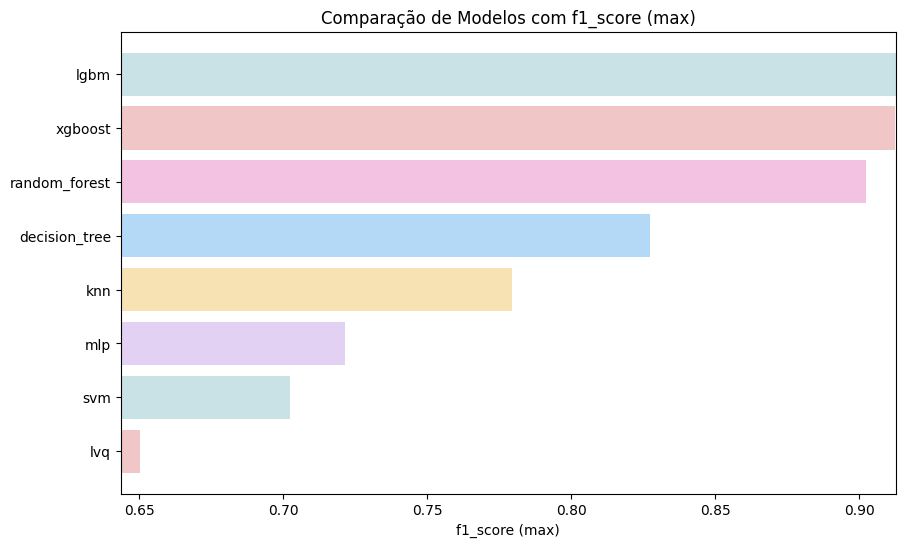

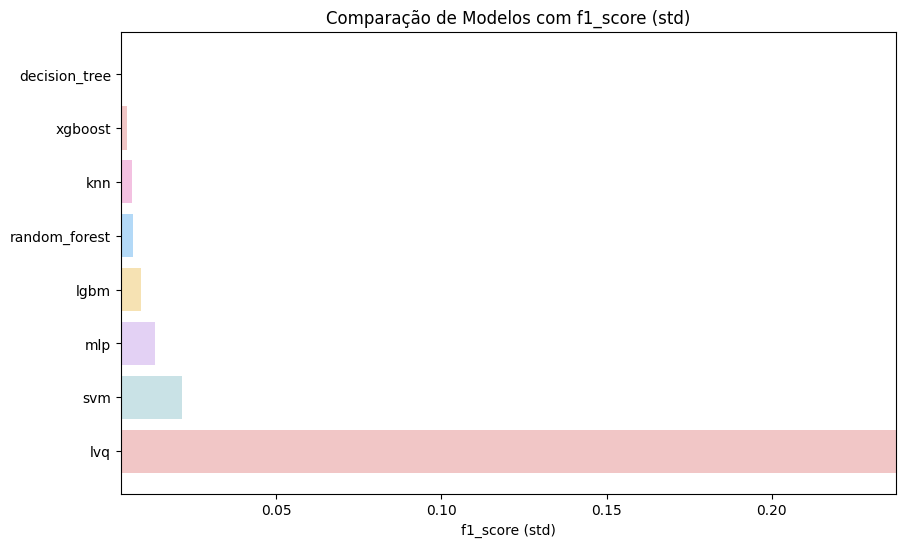

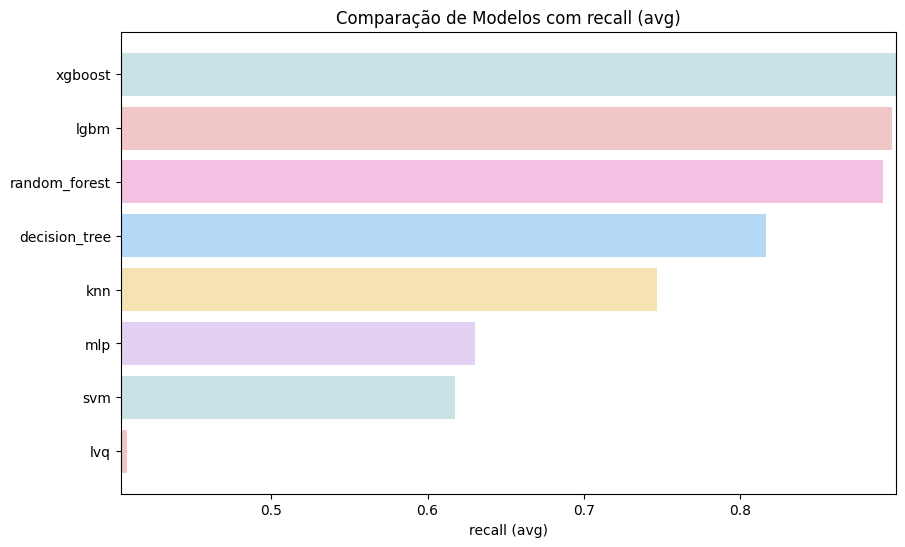

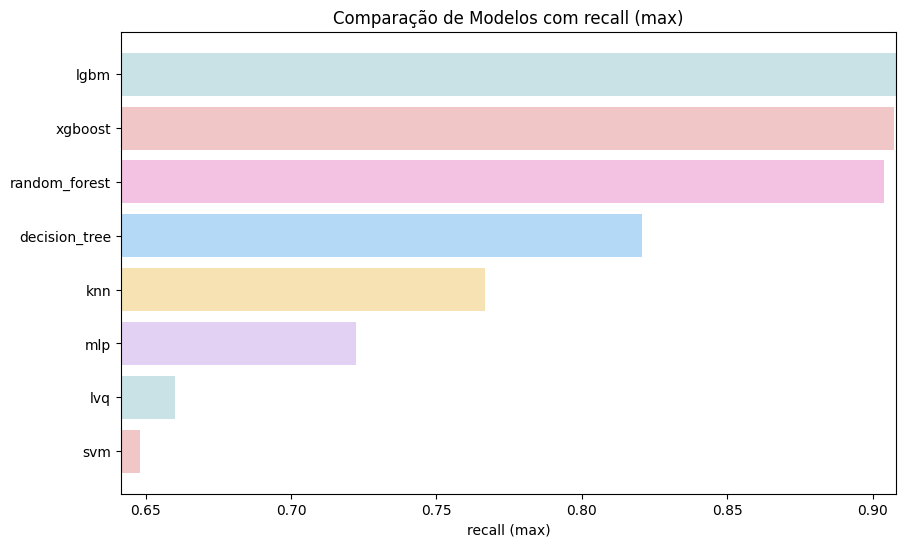

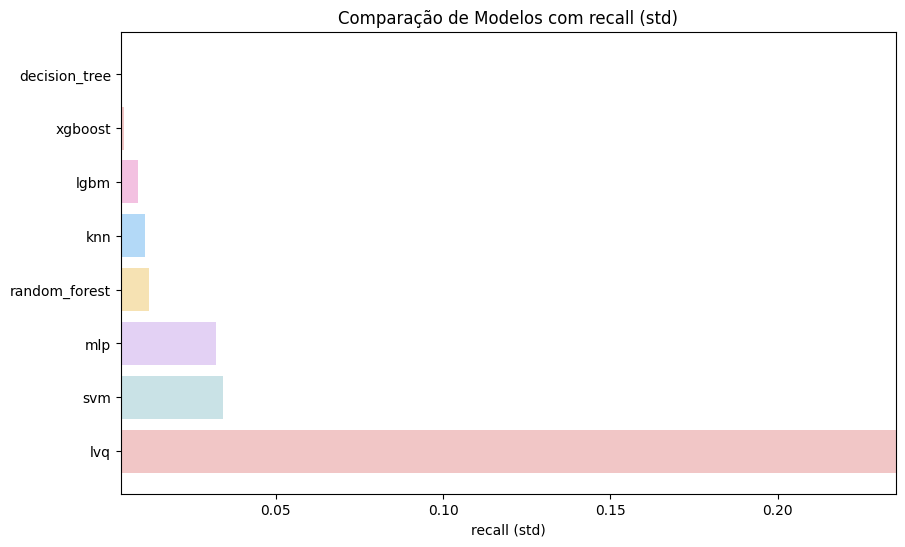

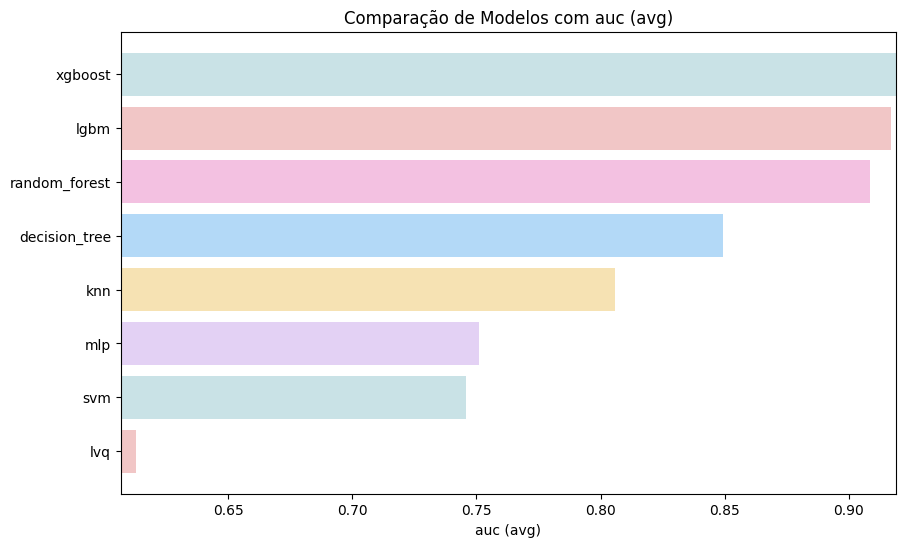

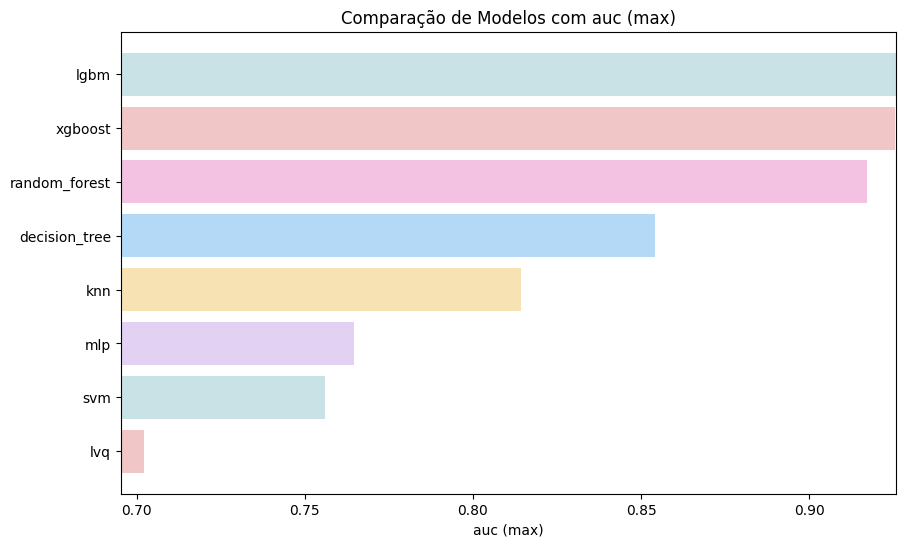

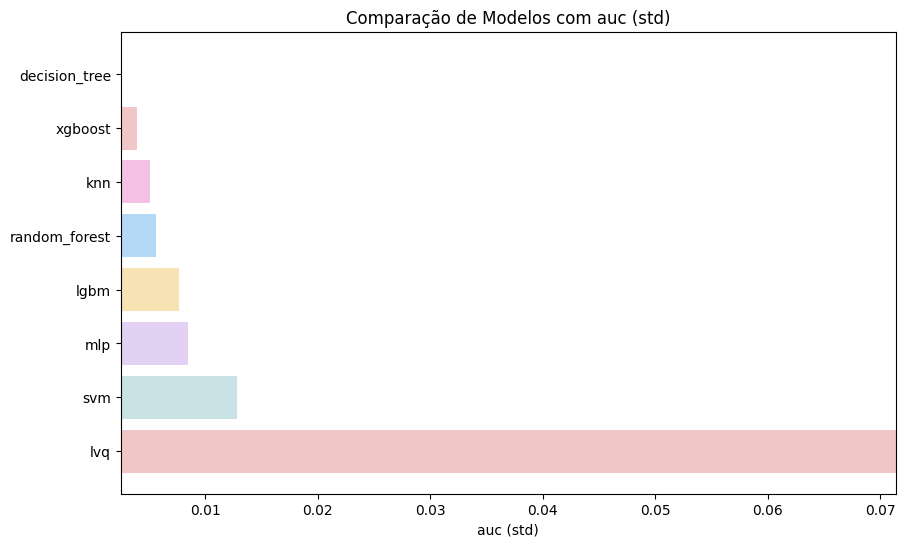

In [11]:
for metric in  ["model_time", "accuracy_test", "f1_score", "recall", "auc"]:
    for t in ['avg', 'max', 'std']:
        plot_comparison_with_custom_axis(comparison_df, metric, t)